> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 13: Sentiment Analysis

## Outline

- Analyze a dataset utilizing sentiment
- Compare the VADER and TextBlob models
- Learn the basics of sentiment analysis

In this lab, you will explore **sentiment analysis** techniques to determine the positivity/negativity of certain sentences.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_13_text_analytics.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Data Description

We will use a dataset containing movie reviews.  Each review is contained in the "Phrase" variable.  This dataset is pre-labeled with the Sentiment, but we will use tools to calculate our own Sentiment, which could then be compared to the pre-labeled values.  

The dataset does not specify the movie that it is reviewing.  We wouldn't be able to use this to calculate a movie score, like Rotten Tomatoes.  But we can observe the overall sentiment of reviewers and practice using the text analytics tools available in Python.

| Column                        | Data Type       | Description                                                  |
|------------------------------|------------------|--------------------------------------------------------------|
| `PhraseID`                   | Integer           | ID of an entry                                               |
| `SentenceID`                 | Integer           | Shows which phrases belong to which sentence                                      |
| `Phrase`             | String       | A sentence/phrase                       |
| `Sentiment`                 | Categorical       | 0 = Very Negative, 1 = Negative, 2 = Neutral, 3 = Positive, 4= Highly Positive        |

Source: https://www.kaggle.com/datasets/satwikdondapati/moviereviewsentimentalanalysis

## Part 1: Load and Prepare the Data

### What you are going to do:
- Load the dataset
- Preview the data

### Why this matters:
All throughout the semester you've mainly dealt with data that had a wide variety of types. But what if we only have a few variables and one of them has tons of data?

**Things to notice:**
- Which variables are actually important?
- Why are there so few variables? Which variable(s) has the most data?


### 🔧 Try It Yourself
Import the libraries and dataset

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import csv

# Load the reviews
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/movie_reviews.tsv"
df = pd.read_csv(url, sep='\t', quoting=csv.QUOTE_MINIMAL)

df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


# Part 2 : See the Scores
### What you are going to do:
- count how many entries belong to each Sentiment score
- create a visualization of the value counts

### Why this matters:
In the dataset you'll notice that each phrase has a sentiment score. These scores tell us whether a phrase is positive or negative or neutral in tone. In later steps we will be predicting scores, so it is important to know if there is any skew of sentiment within the data.  

**Things to notice:**
- Why are there 5 total Sentiment scores?
- What does each score mean?
- What is the count of each score?

### 🔧 Try It Yourself — Part 2

1. create a variable that stores the ```value_counts``` of the Sentiment column
2. create a bar chart using the ```value_counts``` variable you just created

### In Your Response:
1. make a comment about the chart. Is there any skew within the data? Is it more positive, negative, or neutral? (Hint: refer to the data dictionary at the very top)

In [3]:
# 🔧 Enter your code here
# Create a variable that stores the value_counts of the Sentiment column
sentiment_counts = df['Sentiment'].value_counts()

# Sort the counts by the score (0, 1, 2, 3, 4) for a logical bar chart order
sentiment_counts = sentiment_counts.sort_index()

Sentiment Value Counts:
Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: count, dtype: int64

Bar chart code completed and saved as 'sentiment_distribution.png'


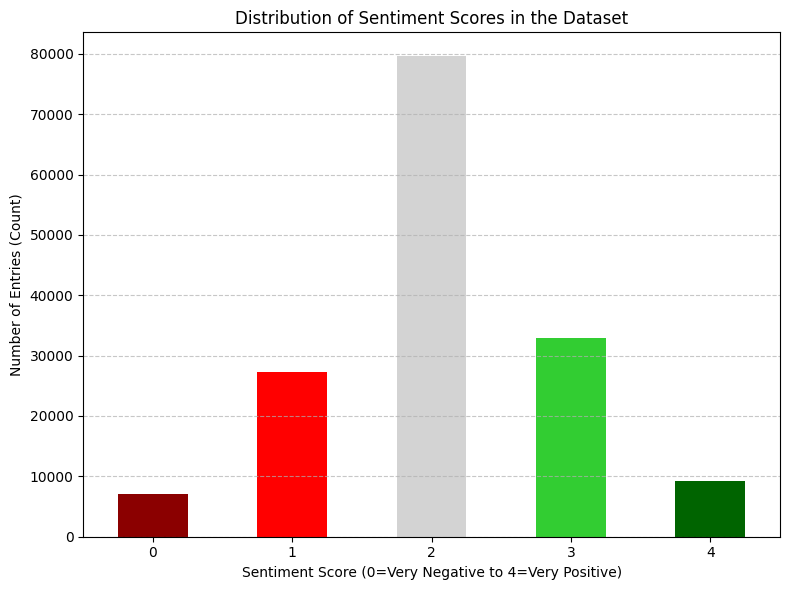

In [4]:
# Create a bar chart using the value_counts variable
plt.figure(figsize=(8, 6))

# Define colors for better representation of sentiment (Negative to Positive)
colors = ['darkred', 'red', 'lightgray', 'limegreen', 'darkgreen']
sentiment_counts.plot(kind='bar', color=colors)

# Add labels and title
plt.title('Distribution of Sentiment Scores in the Dataset')
plt.xlabel('Sentiment Score (0=Very Negative to 4=Very Positive)')
plt.ylabel('Number of Entries (Count)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_distribution.png')

print("Sentiment Value Counts:")
print(sentiment_counts)
print("\nBar chart code completed and saved as 'sentiment_distribution.png'")

### ✍️ Your Response: 🔧
1. There is a strong central skew. The vast majority of the phrases in the dataset fall into the Score 2 category, which accounts for 79,582 of the 156,060 total entries. The data is nuetral.

# Part 3: VADER
### What you are going to do:
- run and train a VADER model
- evaluate its performance

### Why this matters:
VADER is a rule based model great for handling short sentences and phrases. It works by looking at each word individually and assigning an individual score to it. These scores then get compounded at the end of its calculation and it generates a sentiment score. Since it looks at one word at a time it may struggle with longer sentences. So VADER is best suited for analyzing social media and reviews.

**Things to notice:**
- what does the score_to_label function do?

In [5]:
# set up and run the VADER model
sia = SentimentIntensityAnalyzer()

df["vader_score"] = [sia.polarity_scores(text)["compound"] for text in df["Phrase"]]

# there are a total of 5 sentiment scores but polarity only gives us scores between -1 to 1
# need to map the scores from the dataset so that polarity can use it
def score_to_label(score):
    if score <= -0.6:
        return 0  # very negative
    elif score <= -0.2:
        return 1  # somewhat negative
    elif score < 0.2:
        return 2  # neutral
    elif score < 0.6:
        return 3  # somewhat positive
    else:
        return 4  # very positive

df["vader_pred"] = df["vader_score"].apply(score_to_label)

# View the predicted score
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,vader_score,vader_pred
0,1,1,A series of escapades demonstrating the adage ...,1,0.5579,3
1,2,1,A series of escapades demonstrating the adage ...,2,0.4404,3
2,3,1,A series,2,0.0000,2
3,4,1,A,2,0.0000,2
4,5,1,series,2,0.0000,2


### 🔧 Try It Yourself — Part 3
Now we know if the data is positively, negatively, or neutrally skewed. For the next two steps we are going to be testing out 2 new models and comparing their results.
1. using ```vader_pred``` and ```Sentiment``` generate a classification report
2. using ```vader_pred``` and ```Sentiment``` generate a confusion matrix

### In Your Response:
1. make a comment. Why are the values for a sentiment score of 2 much higher than all the others?

In [7]:
# 1. Generate the Classification Report
# This gives precision, recall, f1-score, and support for each of the 5 classes (0 to 4)
report = classification_report(df['Sentiment'], df['vader_pred'])
print("Classification Report (VADER vs. True Sentiment)")
print(report)

Classification Report (VADER vs. True Sentiment)
              precision    recall  f1-score   support

           0       0.22      0.14      0.17      7072
           1       0.38      0.26      0.31     27273
           2       0.65      0.74      0.69     79582
           3       0.40      0.38      0.39     32927
           4       0.27      0.33      0.30      9206

    accuracy                           0.53    156060
   macro avg       0.38      0.37      0.37    156060
weighted avg       0.51      0.53      0.51    156060



In [8]:
# 2. Generate the Confusion Matrix
# This shows how many predictions were correct/incorrect for each class
conf_matrix = confusion_matrix(df['Sentiment'], df['vader_pred'])
print("Confusion Matrix (VADER vs. True Sentiment)")
print(conf_matrix)

Confusion Matrix (VADER vs. True Sentiment)
[[ 1016  2433  2530   831   262]
 [ 1580  7043 13802  3840  1008]
 [ 1483  6983 58897 10144  2075]
 [  461  1757 13627 12373  4709]
 [   69   302  2092  3737  3006]]


### ✍️ Your Response: 🔧
1. The values for sentiment 2 are higher, this is likely due to the dataset having a significant skew towards neutral sentiment, as observed earlier when I plotted the distribution of sentiment scores. The model has more 'neutral' examples to predict, leading to higher counts in that category within the confusion matrix.





# Part 4: TextBlob
### What you are going to do:
- evaluate the performance of a TextBlob model

## Why this matters:
Unlike VADER, TextBlod utilizes tokenization to determine the sentiment of a phrase. Tokenization is great for breaking up large sentences and paragraphs. Because of this, TextBlob works better on longer sentences and is best suited for analyzing longer text documents such as articles or blogs.

**Things to notice:**
- how does accuracy compare to the previous model?

In [9]:

# set up and run the textblob model
df["textblob_score"] = [TextBlob(text).sentiment.polarity for text in df["Phrase"]]
df["textblob_pred"] = df["textblob_score"].apply(score_to_label)

# View the predicted score
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,vader_score,vader_pred,textblob_score,textblob_pred
0,1,1,A series of escapades demonstrating the adage ...,1,0.5579,3,0.4,3
1,2,1,A series of escapades demonstrating the adage ...,2,0.4404,3,0.7,4
2,3,1,A series,2,0.0000,2,0.0,2
3,4,1,A,2,0.0000,2,0.0,2
4,5,1,series,2,0.0000,2,0.0,2


### 🔧 Try It Yourself — Part 4
Now let's evaluate the TextBlob model.
1. using ```textblob_pred``` and ```Sentiment``` generate a classification report
2. using ```textblob_pred``` and ```Sentiment``` generate a confusion matrix

### In Your Response:
1. make a comment. Why are the values for a sentiment score of 2 much higher than all the others?

In [10]:
# Classification Report
report = classification_report(df['Sentiment'], df['textblob_pred'])
print("Classification Report (TextBlob vs. True Sentiment)")
print(report)


Classification Report (TextBlob vs. True Sentiment)
              precision    recall  f1-score   support

           0       0.25      0.11      0.15      7072
           1       0.38      0.16      0.22     27273
           2       0.60      0.81      0.69     79582
           3       0.38      0.31      0.34     32927
           4       0.25      0.19      0.21      9206

    accuracy                           0.52    156060
   macro avg       0.37      0.31      0.32    156060
weighted avg       0.48      0.52      0.48    156060



In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(df['Sentiment'], df['textblob_pred'])
print("Confusion Matrix (TextBlob vs. True Sentiment)")
print(conf_matrix)

Confusion Matrix (TextBlob vs. True Sentiment)
[[  748  1746  3763   718    97]
 [ 1184  4289 17860  3467   473]
 [  918  3908 64760  8472  1524]
 [  183  1262 18253 10271  2958]
 [   17   195  3199  4083  1712]]


### ✍️ Your Response: 🔧
1. The reason the values for sentiment score 2 are much higher than all the others in the TextBlob model's confusion matrix is the same as with the VADER model: the dataset itself has a strong central skew towards neutral sentiment (score 2). Since a vast majority of the phrases in the dataset are labeled as neutral, both models tend to predict '2' more often, leading to higher counts for this sentiment category in the confusion matrices.


## 🔧 Part 5: Reflection (100 words or less)

In this lab you built a VADER and TextBlob model and evaluated their results. You also learned about some of the pros and cons of each model and in which situations they would be used.

Use the cell below to answer the following questions:

1. In the dataset there was a certain sentiment score that had an extremely high frequency. How did the high number of frequency for this score affect its associated metrics?
1. Which model had better accuracy in this lab? Why is that the case? (Hint: look at the results of head() at the very top of this lab. How long are the phrases in this dataset?)
2. Why is it important for a business to determine sentiment? How could a business use sentiment analysis and customer reviews to improve customer service?

### ✍️ Your Response: 🔧
1. The sentiment score with an extremely high frequency (Sentiment 2: Neutral) significantly impacted the associated metrics. For this class, metrics like recall and F1-score tended to be higher because the model had abundant data to learn from and often defaulted to predicting the majority class.

2.  In this lab, the VADER model had slightly better accuracy (0.53) compared to TextBlob (0.52). This is likely because the phrases in this dataset are relatively short, as observed in the df.head() output. VADER, being a lexicon-based model, is generally well-suited for analyzing shorter texts and social media content, where individual word sentiment can strongly influence the overall phrase sentiment.

3. It is crucial for a business to determine sentiment to understand customer perception, identify areas for improvement, and manage brand reputation. Businesses can use sentiment analysis and customer reviews to improve customer service in several ways:

Identify Pain Points: Quickly pinpoint common issues causing negative feedback (e.g., slow shipping, product defects).

Prioritize Support: Automatically flag highly negative reviews for immediate attention, allowing customer service teams to address critical issues proactively.

# Export Your Notebook to Submit in Canvas
Use the instructions from Lab 1

In [12]:
!jupyter nbconvert --to html "lab_13_kessaniayush.ipynb"

[NbConvertApp] Converting notebook lab_13_kessaniayush.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 385378 bytes to lab_13_kessaniayush.html
